# EchoRegions Regions2D

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
from pathlib import Path

In [2]:
import sys
sys.path.append('..')
import echoregions as er
pd.set_option("display.max_columns", None)

## Set Paths

In [3]:
# Regions paths
evr_paths = Path('D:/Documents/Projects/echoregions/echoregions/test_data/ek60/regions')
# Data paths
raw_paths = Path('F:/data/hake/raw/SH1707')

evr_files = list(evr_paths.glob('*.evr'))
raw_files = list(raw_paths.glob('*.nc'))

## Read EVR file

In [4]:
r2d = er.read_evr(evr_files[0])
r2d

In [5]:
# The path to the parsed EVR file is stored in input_file
r2d.input_file

'D:\\Documents\\Projects\\echoregions\\echoregions\\test_data\\ek60\\regions\\x1.evr'

In [6]:
# Data is stored as a Pandas DataFrame in 'data'
r2d.data.head()

,file_name,file_type,file_format_number,echoview_version,region_id,structure_version,point_count,selected,creation_type,dummy,bounding_rectangle_calculated,bounding_rectangle_left,bounding_rectangle_right,bounding_rectangle_top,bounding_rectangle_bottom,region_classification,type,name,ping_time,depth,notes,detection_settings
0,x1,EVRG,7,9.0.279.33861,1,13,4,0,6,-1,1,2017-06-25 16:12:34.333500,2017-06-25 16:12:38.288000,-9999.99,9999.99,Log,2,CTD005,"[2017-06-25T16:12:34.333500000, 2017-06-25T16:...","[-9999.99, 9999.99, 9999.99, -9999.99]",[CTD005 at depth],[]
1,x1,EVRG,7,9.0.279.33861,2,13,4,0,6,-1,1,2017-06-25 16:31:36.338500,2017-06-25 16:31:40.211500,-9999.99,9999.99,Log,2,VN001,"[2017-06-25T16:31:36.338500000, 2017-06-25T16:...","[-9999.99, 9999.99, 9999.99, -9999.99]",[VN001 @ PC1500],[]
2,x1,EVRG,7,9.0.279.33861,3,13,4,0,6,-1,1,2017-06-25 16:58:09.122500,2017-06-25 16:58:12.999500,-9999.99,9999.99,Log,2,ST1,"[2017-06-25T16:58:09.122500000, 2017-06-25T16:...","[-9999.99, 9999.99, 9999.99, -9999.99]",[ST1 - Finally!!!!],[]
3,x1,EVRG,7,9.0.279.33861,4,13,4,0,4,-1,1,2017-06-25 15:39:22.332000,2017-06-25 16:58:09.122500,9.244758,758.973217,Side station,0,Region4,"[2017-06-25T15:39:22.332000000, 2017-06-25T15:...","[9.2447583998, 758.9732173069, 758.9732173069,...",[],[]
4,x1,EVRG,7,9.0.279.33861,5,13,4,0,4,-1,1,2017-06-25 15:04:28.137000,2017-06-25 15:39:26.205000,9.244758,758.973217,Off-transect,0,Region5,"[2017-06-25T15:04:28.137000000, 2017-06-25T15:...","[9.2447583998, 758.9732173069, 758.9732173069,...",[],[]


In this example, the first row has a depth value of [-9999.99, 9999.99, 9999.99, -9999.99].
This indicates that the depth points are not actual values, but are points at the edges of the echogram or that the region is not bounded in the y axis.

To set these values to something that can easily be plotted, set the `min_depth` and `max_depth`, or provide a `depth` array (meters).

In [7]:
r2d.min_depth = 0
r2d.max_depth = 1000
r2d.replace_nan_depth().head()[['bounding_rectangle_top', 'bounding_rectangle_bottom', 'depth']]

,bounding_rectangle_top,bounding_rectangle_bottom,depth
0,0.000000,1000.000000,"[0.0, 1000.0, 1000.0, 0.0]"
1,0.000000,1000.000000,"[0.0, 1000.0, 1000.0, 0.0]"
2,0.000000,1000.000000,"[0.0, 1000.0, 1000.0, 0.0]"
3,9.244758,758.973217,"[9.2447583998, 758.9732173069, 758.9732173069,..."
4,9.244758,758.973217,"[9.2447583998, 758.9732173069, 758.9732173069,..."


The option to specify an offset for depth value is also provided.

In [8]:
r2d.offset = 4
r2d.adjust_offset()

,file_name,file_type,file_format_number,echoview_version,region_id,structure_version,point_count,selected,creation_type,dummy,bounding_rectangle_calculated,bounding_rectangle_left,bounding_rectangle_right,bounding_rectangle_top,bounding_rectangle_bottom,region_classification,type,name,ping_time,depth,notes,detection_settings
0,x1,EVRG,7,9.0.279.33861,1,13,4,0,6,-1,1,2017-06-25 16:12:34.333500,2017-06-25 16:12:38.288000,-9999.99,9999.99,Log,2,CTD005,"[2017-06-25T16:12:34.333500000, 2017-06-25T16:...","[4.0, 1004.0, 1004.0, 4.0]",[CTD005 at depth],[]
1,x1,EVRG,7,9.0.279.33861,2,13,4,0,6,-1,1,2017-06-25 16:31:36.338500,2017-06-25 16:31:40.211500,-9999.99,9999.99,Log,2,VN001,"[2017-06-25T16:31:36.338500000, 2017-06-25T16:...","[4.0, 1004.0, 1004.0, 4.0]",[VN001 @ PC1500],[]
2,x1,EVRG,7,9.0.279.33861,3,13,4,0,6,-1,1,2017-06-25 16:58:09.122500,2017-06-25 16:58:12.999500,-9999.99,9999.99,Log,2,ST1,"[2017-06-25T16:58:09.122500000, 2017-06-25T16:...","[4.0, 1004.0, 1004.0, 4.0]",[ST1 - Finally!!!!],[]
3,x1,EVRG,7,9.0.279.33861,4,13,4,0,4,-1,1,2017-06-25 15:39:22.332000,2017-06-25 16:58:09.122500,9.244758,758.973217,Side station,0,Region4,"[2017-06-25T15:39:22.332000000, 2017-06-25T15:...","[13.2447583998, 762.9732173069, 762.9732173069...",[],[]
4,x1,EVRG,7,9.0.279.33861,5,13,4,0,4,-1,1,2017-06-25 15:04:28.137000,2017-06-25 15:39:26.205000,9.244758,758.973217,Off-transect,0,Region5,"[2017-06-25T15:04:28.137000000, 2017-06-25T15:...","[13.2447583998, 762.9732173069, 762.9732173069...",[],[]
5,x1,EVRG,7,9.0.279.33861,6,13,4,0,6,-1,1,2017-06-25 17:57:06.806500,2017-06-25 17:57:09.687500,-9999.99,9999.99,Log,2,BT2,"[2017-06-25T17:57:06.806500000, 2017-06-25T17:...","[4.0, 1004.0, 1004.0, 4.0]",[BT2 for VN2 PC1000],[]
6,x1,EVRG,7,9.0.279.33861,7,13,4,0,6,-1,1,2017-06-25 18:26:31.322000,2017-06-25 18:26:34.201500,-9999.99,9999.99,Log,2,CTD006,"[2017-06-25T18:26:31.322000000, 2017-06-25T18:...","[4.0, 1004.0, 1004.0, 4.0]",[CTD006 at depth],[]
7,x1,EVRG,7,9.0.279.33861,8,13,4,0,6,-1,1,2017-06-25 18:45:16.470500,2017-06-25 18:45:19.344500,-9999.99,9999.99,Log,2,VN002,"[2017-06-25T18:45:16.470500000, 2017-06-25T18:...","[4.0, 1004.0, 1004.0, 4.0]",[VN002 @ PC1000 in the water],[]
8,x1,EVRG,7,9.0.279.33861,9,13,4,0,6,-1,1,2017-06-25 19:13:15.563500,2017-06-25 19:13:18.518500,-9999.99,9999.99,Log,2,RT1,"[2017-06-25T19:13:15.563500000, 2017-06-25T19:...","[4.0, 1004.0, 1004.0, 4.0]",[RT1 after VN002],[]
9,x1,EVRG,7,9.0.279.33861,10,13,4,0,4,-1,1,2017-06-25 17:57:09.687500,2017-06-25 19:13:12.607500,9.244758,758.973217,Side station,0,Region10,"[2017-06-25T17:57:09.687500000, 2017-06-25T17:...","[13.2447583998, 762.9732173069, 762.9732173069...",[],[]


replace_nan_depth and adjust_offset returns a new DataFrame by default, but setting the `inplace`
argument to `True` will modify Regions2D.data inplace.

## Selecting regions

In [9]:
# A region can be selected by region id with a single region_id value
r2d.select_region(12)

,file_name,file_type,file_format_number,echoview_version,region_id,structure_version,point_count,selected,creation_type,dummy,bounding_rectangle_calculated,bounding_rectangle_left,bounding_rectangle_right,bounding_rectangle_top,bounding_rectangle_bottom,region_classification,type,name,ping_time,depth,notes,detection_settings
11,x1,EVRG,7,9.0.279.33861,12,13,4,0,6,-1,1,2017-06-25 20:11:47.088500,2017-06-25 20:11:49.961,-9999.99,9999.99,Log,2,BT1,"[2017-06-25T20:11:47.088500000, 2017-06-25T20:...","[0.0, 1000.0, 1000.0, 0.0]",[BT1 for VN3 @ PC500],[]


In [10]:
# ... or multiple region_id values
r2d.select_region([1,2,3,4])

,file_name,file_type,file_format_number,echoview_version,region_id,structure_version,point_count,selected,creation_type,dummy,bounding_rectangle_calculated,bounding_rectangle_left,bounding_rectangle_right,bounding_rectangle_top,bounding_rectangle_bottom,region_classification,type,name,ping_time,depth,notes,detection_settings
0,x1,EVRG,7,9.0.279.33861,1,13,4,0,6,-1,1,2017-06-25 16:12:34.333500,2017-06-25 16:12:38.288000,-9999.99,9999.99,Log,2,CTD005,"[2017-06-25T16:12:34.333500000, 2017-06-25T16:...","[0.0, 1000.0, 1000.0, 0.0]",[CTD005 at depth],[]
1,x1,EVRG,7,9.0.279.33861,2,13,4,0,6,-1,1,2017-06-25 16:31:36.338500,2017-06-25 16:31:40.211500,-9999.99,9999.99,Log,2,VN001,"[2017-06-25T16:31:36.338500000, 2017-06-25T16:...","[0.0, 1000.0, 1000.0, 0.0]",[VN001 @ PC1500],[]
2,x1,EVRG,7,9.0.279.33861,3,13,4,0,6,-1,1,2017-06-25 16:58:09.122500,2017-06-25 16:58:12.999500,-9999.99,9999.99,Log,2,ST1,"[2017-06-25T16:58:09.122500000, 2017-06-25T16:...","[0.0, 1000.0, 1000.0, 0.0]",[ST1 - Finally!!!!],[]
3,x1,EVRG,7,9.0.279.33861,4,13,4,0,4,-1,1,2017-06-25 15:39:22.332000,2017-06-25 16:58:09.122500,9.244758,758.973217,Side station,0,Region4,"[2017-06-25T15:39:22.332000000, 2017-06-25T15:...","[9.2447583998, 758.9732173069, 758.9732173069,...",[],[]


**At the moment, Regions2D implements \_\_iter__ and \_\_getitem__ for convenience**

In [11]:
# Iterate over rows
for idx, region in r2d:
    print(region['notes'])

['CTD005 at depth']
['VN001 @ PC1500']
['ST1 - Finally!!!!']
[]
[]
['BT2 for VN2 PC1000']
['CTD006 at depth']
['VN002 @ PC1000 in the water']
['RT1 after VN002']
[]
[]
['BT1 for VN3 @ PC500']
['CTD007 at PC500']
['Vertical net 003 @ PC500 in the water']
[]
['RT1']
['BT1 for PC300 + VN004']
['CTD008 at depth']
['Vertical net 004 @ PC300 in the water']
[]
['Resume transect 1']
[]
['Break transect 1']
['CTD09 at depth at PC150']
['Vertical net 005 in the water @ PC150']
[]
['RT1']
[]
['Back on original transect line (went around oil platform)']
['End transect 1']
['CTD010 at depth']
['Vertical net 006 at PC60']
[]


In [12]:
# Slice by index (NOT BY REGION ID)
r2d[4:7]

,file_name,file_type,file_format_number,echoview_version,region_id,structure_version,point_count,selected,creation_type,dummy,bounding_rectangle_calculated,bounding_rectangle_left,bounding_rectangle_right,bounding_rectangle_top,bounding_rectangle_bottom,region_classification,type,name,ping_time,depth,notes,detection_settings
4,x1,EVRG,7,9.0.279.33861,5,13,4,0,4,-1,1,2017-06-25 15:04:28.137000,2017-06-25 15:39:26.205000,9.244758,758.973217,Off-transect,0,Region5,"[2017-06-25T15:04:28.137000000, 2017-06-25T15:...","[9.2447583998, 758.9732173069, 758.9732173069,...",[],[]
5,x1,EVRG,7,9.0.279.33861,6,13,4,0,6,-1,1,2017-06-25 17:57:06.806500,2017-06-25 17:57:09.687500,-9999.99,9999.99,Log,2,BT2,"[2017-06-25T17:57:06.806500000, 2017-06-25T17:...","[0.0, 1000.0, 1000.0, 0.0]",[BT2 for VN2 PC1000],[]
6,x1,EVRG,7,9.0.279.33861,7,13,4,0,6,-1,1,2017-06-25 18:26:31.322000,2017-06-25 18:26:34.201500,-9999.99,9999.99,Log,2,CTD006,"[2017-06-25T18:26:31.322000000, 2017-06-25T18:...","[0.0, 1000.0, 1000.0, 0.0]",[CTD006 at depth],[]


## Selecting Sonar File

If you have a lot of files, it can be annoying or time consuming to find out which sonar file(s) a particular region belongs to. EchoRegions solves this issue with `select_sonar_file`. Pass the list of sonar file paths to the function along with the region to get back the smallest subset of the sonar files that encompass the region.

In [13]:
# Selecting one region
r2d.select_sonar_file(raw_files, 12)

WindowsPath('F:/data/hake/raw/SH1707/Summer2017-D20170625-T195927.nc')

In [14]:
# Selecting 3 regions
r2d.select_sonar_file(raw_files, [9, 10, 11])

[WindowsPath('F:/data/hake/raw/SH1707/Summer2017-D20170625-T175136.nc'),
 WindowsPath('F:/data/hake/raw/SH1707/Summer2017-D20170625-T181701.nc'),
 WindowsPath('F:/data/hake/raw/SH1707/Summer2017-D20170625-T184227.nc'),
 WindowsPath('F:/data/hake/raw/SH1707/Summer2017-D20170625-T190753.nc'),
 WindowsPath('F:/data/hake/raw/SH1707/Summer2017-D20170625-T193400.nc'),
 WindowsPath('F:/data/hake/raw/SH1707/Summer2017-D20170625-T195927.nc')]

## Plotting

The `plot` function will plot all of the the reigons passed into it. It also takes additional keyword arguments that can be used by matplotlib to customize the plot.

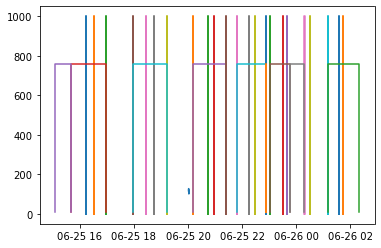

In [15]:
# Plot all regions
r2d.plot()

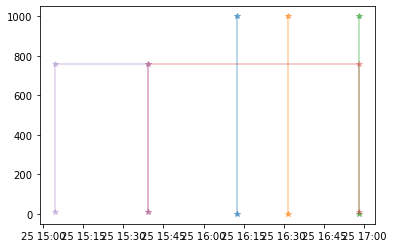

In [16]:
# Plot a subset of regions with options made availible by matplotlib
r2d.plot(r2d[:5], alpha=.3, marker="*")

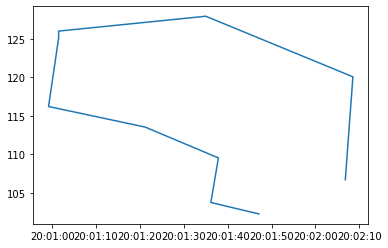

In [17]:
# Plot a region by region ID
r2d.plot(11)

These regions should be closed polygons, but they are provided as a list of points, and matplotlib does not automatically connect the first and last points. Plotting the closed region can be done by specifying `close_region=True` when calling `plot` or by replacing the data with the one returned by `Regions2D.close_region`.

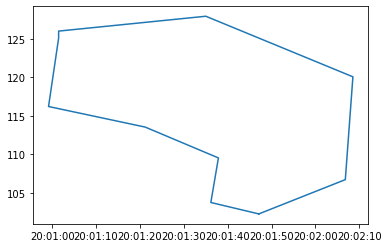

In [18]:
# Plot a closed region without modifying Regions2D.data
r2d.plot(11, close_region=True)

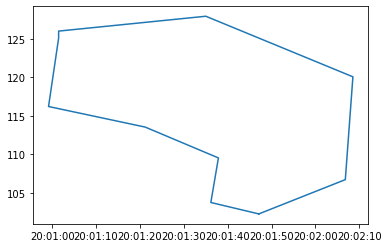

In [19]:
# Plot a closed region without modifying Regions2D.data
r2d.data = r2d.close_region()
r2d.plot(11)

## Subselecting

The powerful indexing capabilities that Pandas provides allows users allows users to filter out the regions that they are interested in.

In [20]:
# Select by a column value
r2d.data.loc[r2d.data['region_classification'] == 'Side station']

,file_name,file_type,file_format_number,echoview_version,region_id,structure_version,point_count,selected,creation_type,dummy,bounding_rectangle_calculated,bounding_rectangle_left,bounding_rectangle_right,bounding_rectangle_top,bounding_rectangle_bottom,region_classification,type,name,ping_time,depth,notes,detection_settings
3,x1,EVRG,7,9.0.279.33861,4,13,4,0,4,-1,1,2017-06-25 15:39:22.332000,2017-06-25 16:58:09.122500,9.244758,758.973217,Side station,0,Region4,"[2017-06-25T15:39:22.332000000, 2017-06-25T15:...","[9.2447583998, 758.9732173069, 758.9732173069,...",[],[]
9,x1,EVRG,7,9.0.279.33861,10,13,4,0,4,-1,1,2017-06-25 17:57:09.687500,2017-06-25 19:13:12.607500,9.244758,758.973217,Side station,0,Region10,"[2017-06-25T17:57:09.687500000, 2017-06-25T17:...","[9.2447583998, 758.9732173069, 758.9732173069,...",[],[]
14,x1,EVRG,7,9.0.279.33861,15,13,4,0,4,-1,1,2017-06-25 20:11:48.884000,2017-06-25 21:23:56.787600,9.244758,758.973217,Side station,0,Region15,"[2017-06-25T20:11:48.884000000, 2017-06-25T20:...","[9.2447583998, 758.9732173069, 758.9732173069,...",[],[]
19,x1,EVRG,7,9.0.279.33861,20,13,4,0,4,-1,1,2017-06-25 21:48:01.046000,2017-06-25 22:52:51.322300,9.244758,758.973217,Side station,0,Region20,"[2017-06-25T21:48:01.046000000, 2017-06-25T21:...","[9.2447583998, 758.9732173069, 758.9732173069,...",[],[]
25,x1,EVRG,7,9.0.279.33861,27,13,4,0,4,-1,1,2017-06-25 23:02:47.289200,2017-06-25 23:45:38.939500,9.244758,758.973217,Side station,0,Region27,"[2017-06-25T23:02:47.289200000, 2017-06-25T23:...","[9.2447583998, 758.9732173069, 758.9732173069,...",[],[]
32,x1,EVRG,7,9.0.279.33861,35,13,4,0,4,-1,1,2017-06-26 01:10:58.457600,2017-06-26 02:20:09.872200,9.244758,758.973217,Side station,0,Region35,"[2017-06-26T01:10:58.457600000, 2017-06-26T01:...","[9.2447583998, 758.9732173069, 758.9732173069,...",[],[]


In [58]:
# Selecting regions using a timestamp 
r2d.data.loc[r2d.data['bounding_rectangle_left'] < '2017-06-25 16:32:00']

,file_name,file_type,file_format_number,echoview_version,region_id,structure_version,point_count,selected,creation_type,dummy,bounding_rectangle_calculated,bounding_rectangle_left,bounding_rectangle_right,bounding_rectangle_top,bounding_rectangle_bottom,region_classification,type,name,ping_time,depth,notes,detection_settings
0,x1,EVRG,7,9.0.279.33861,1,13,4,0,6,-1,1,2017-06-25 16:12:34.333500,2017-06-25 16:12:38.288000,-9999.99,9999.99,Log,2,CTD005,"[2017-06-25T16:12:34.333500000, 2017-06-25T16:...","[0.0, 1000.0, 1000.0, 0.0, 0.0]",[CTD005 at depth],[]
1,x1,EVRG,7,9.0.279.33861,2,13,4,0,6,-1,1,2017-06-25 16:31:36.338500,2017-06-25 16:31:40.211500,-9999.99,9999.99,Log,2,VN001,"[2017-06-25T16:31:36.338500000, 2017-06-25T16:...","[0.0, 1000.0, 1000.0, 0.0, 0.0]",[VN001 @ PC1500],[]
3,x1,EVRG,7,9.0.279.33861,4,13,4,0,4,-1,1,2017-06-25 15:39:22.332000,2017-06-25 16:58:09.122500,9.244758,758.973217,Side station,0,Region4,"[2017-06-25T15:39:22.332000000, 2017-06-25T15:...","[9.2447583998, 758.9732173069, 758.9732173069,...",[],[]
4,x1,EVRG,7,9.0.279.33861,5,13,4,0,4,-1,1,2017-06-25 15:04:28.137000,2017-06-25 15:39:26.205000,9.244758,758.973217,Off-transect,0,Region5,"[2017-06-25T15:04:28.137000000, 2017-06-25T15:...","[9.2447583998, 758.9732173069, 758.9732173069,...",[],[]


In [57]:
# Selecting regions with notes with a name containing VN
df = r2d.data[r2d.data['notes'].astype(bool) & r2d.data['name'].str.contains('VN')]
df[['name', 'notes', 'ping_time', 'depth']]

,name,notes,ping_time,depth
1,VN001,[VN001 @ PC1500],"[2017-06-25T16:31:36.338500000, 2017-06-25T16:...","[0.0, 1000.0, 1000.0, 0.0, 0.0]"
7,VN002,[VN002 @ PC1000 in the water],"[2017-06-25T18:45:16.470500000, 2017-06-25T18:...","[0.0, 1000.0, 1000.0, 0.0, 0.0]"
13,VN003,[Vertical net 003 @ PC500 in the water],"[2017-06-25T20:58:30.235000000, 2017-06-25T20:...","[0.0, 1000.0, 1000.0, 0.0, 0.0]"
18,VN004,[Vertical net 004 @ PC300 in the water],"[2017-06-25T22:28:24.968500000, 2017-06-25T22:...","[0.0, 1000.0, 1000.0, 0.0, 0.0]"
24,VN005,[Vertical net 005 in the water @ PC150],"[2017-06-25T23:39:32.741000000, 2017-06-25T23:...","[0.0, 1000.0, 1000.0, 0.0, 0.0]"
31,VN006,[Vertical net 006 at PC60],"[2017-06-26T01:44:55.408500000, 2017-06-26T01:...","[0.0, 1000.0, 1000.0, 0.0, 0.0]"
